# Autogluon 0.8.2 실습 (Tabular, MultiModalPredictor)

## Tabular 실습 (테이블에서 class 예측)

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
data_root = 'https://autogluon.s3.amazonaws.com/datasets/Inc/'
train = TabularDataset(data_root + 'train.csv')
test = TabularDataset(data_root + 'test.csv')


In [4]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,178478,Bachelors,13,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,<=50K
1,23,State-gov,61743,5th-6th,3,Never-married,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K
2,46,Private,376789,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,15,United-States,<=50K
3,55,?,200235,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,>50K
4,36,Private,224541,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,El-Salvador,<=50K


In [6]:
predictor = TabularPredictor(label='class').fit(train_data=train)
pred = predictor.predict(test)

No path specified. Models will be saved in: "AutogluonModels\ag-20231128_070906\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231128_070906\"
AutoGluon Version:  0.8.2
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   313.04 GB / 498.76 GB (62.8%)
Train Data Rows:    39073
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' <=50K', ' >50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs 

In [7]:
# TabularPredictor 함수는 leaderboard() 함수를 제공하는데, 테스트 데이터에 대한 각 모델의 성능을 평가해줌
predictor.leaderboard(test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.877162,0.8872,0.052011,0.021005,1.440206,0.052011,0.021005,1.440206,1,True,11
1,WeightedEnsemble_L2,0.876344,0.8912,0.331072,0.132114,12.209149,0.004000,0.006071,1.347027,2,True,14
2,CatBoost,0.874399,0.8824,0.041146,0.014715,20.894630,0.041146,0.014715,20.894630,1,True,7
3,LightGBMLarge,0.873784,0.8856,0.092021,0.030006,1.719928,0.092021,0.030006,1.719928,1,True,13
4,LightGBM,0.873477,0.8824,0.066014,0.022005,0.906151,0.066014,0.022005,0.906151,1,True,4
5,LightGBMXT,0.871430,0.8792,0.079018,0.031007,3.224687,0.079018,0.031007,3.224687,1,True,3
6,NeuralNetTorch,0.860170,0.8584,0.062014,0.028006,58.269945,0.062014,0.028006,58.269945,1,True,12
7,NeuralNetFastAI,0.859658,0.8624,0.210496,0.066017,49.096061,0.210496,0.066017,49.096061,1,True,10
8,RandomForestGini,0.859351,0.8612,0.369693,0.087365,2.840380,0.369693,0.087365,2.840380,1,True,5
9,RandomForestEntr,0.857713,0.8592,0.373610,0.096158,3.181581,0.373610,0.096158,3.181581,1,True,6


In [8]:
predictor.evaluate(test, silent=True)

{'accuracy': 0.8763435356740711,
 'balanced_accuracy': 0.7950062351568354,
 'mcc': 0.6395678748952276,
 'roc_auc': 0.9313257313325403,
 'f1': 0.710727969348659,
 'precision': 0.798708288482239,
 'recall': 0.640207075064711}

#

##

# MultiModalPredictor 실습하기

## 애완 동물 입양률 예측하기 ( 0 - 느림, 1 - 빠름)

In [10]:
import os
import warnings

import numpy as np

warnings.filterwarnings('ignore')
np.random.seed(123)

#데이터 가져오기 (PatFinder 데이터세트의 단순화되고 서브샘플링된 버전)

from autogluon.core.utils.loaders import load_zip

download_dir =  './ag_multimodal_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_for_tutorial.zip'


load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|████████████████████████████████████████████████████████████████████████████| 18.8M/18.8M [00:17<00:00, 1.07MiB/s]
Unzipping ./ag_multimodal_tutorial\file.zip to ./ag_multimodal_tutorial


In [20]:
#데이터 불러오기
import pandas as pd

dataset_path = f'{download_dir}/petfinder_for_tutorial'

train = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)

label_col = 'AdoptionSpeed'

In [13]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
0,2,Yumi Hamasaki,4,292,265,2,1,5,7,2,...,1,0,41326,bcc4e1b9557a8b3aaf545ea8e6e86991,0,"I rescued Yumi Hamasaki at a food stall far away in Kelantan. At that time i was on my way back to KL, she was suffer from stomach problem and looking very2 sick.. I send her to vet & get the treatment + vaccinated and right now she's very2 healthy.. About yumi : - love to sleep with ppl - she will keep on meowing if she's hugry - very2 active, always seeking for people to accompany her playing - well trained (poo+pee in her own potty) - easy to bathing - I only feed her with these brands : IAMS, Kittenbites, Pro-formance Reason why i need someone to adopt Yumi: I just married and need to ...",7d7a39d71,3.0,0,images/7d7a39d71-1.jpg
1,2,Nene/ Kimie,12,285,0,2,5,6,7,2,...,1,0,41326,f0450bf0efe0fa3ff9321d0b827b1237,0,Has adopted by a friend with new pet name Kimie,0e107c82f,3.0,0,images/0e107c82f-1.jpg
2,2,Mattie,12,266,0,2,1,7,0,2,...,1,0,41401,9b52af6d48a4521fd01d4028eb5879a3,0,"I rescued Mattie with a broken leg. After surgery with pin inserted in her leg, she's made a full recovery.",1a8fd6707,5.0,0,images/1a8fd6707-1.jpg
3,1,NaN,1,189,307,2,1,2,0,2,...,1,0,41401,88da1210e021a5cf43480b074778f3bc,0,She born on 30 September . I really hope the animal lovers can adopt her.,bca8b44ae,3.0,0,images/bca8b44ae-1.jpg
4,2,Coco,6,276,285,2,2,4,7,2,...,1,100,41326,227d7b1bcfaffb5f9882bf57b5ee8fab,0,Calico Tame and easy going Diet RC Kitten Supplement - brewer yeast + VCO *11.7.17 - Coco had found her new home.,2def67952,1.0,0,images/2def67952-1.jpg


PetFinder 데이터 세트는 이미지 디렉터리와 함께 제공되며 데이터의 일부 레코드에는 여러 이미지가 연결되어 있음. Autogloun의 MultiModal 데이터 프레임 형식에는 이미지 열에서 값이 단일 이미지 파일에 대한 경로인 문자열이 포함되어 있어야 함.
이 예에서는 이미지 기능 열을 첫 번째 이미지로만 제한하고 현재 디렉터리 구조에 대해 모든 것이 올바르게 설정되도록 일부 경로 조작을 수행해야 함


In [14]:
image_col = 'Images'

train[image_col] = train[image_col].apply(lambda ele: ele.split(';')[0])
test[image_col] = test[image_col].apply(lambda ele: ele.split(';')[0])

def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train[image_col] = train[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test[image_col] = test[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

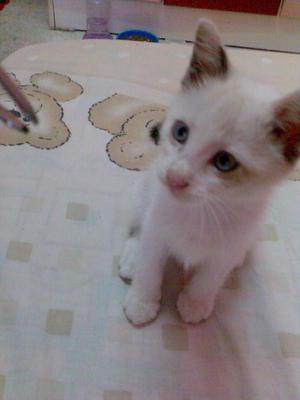

"I rescued Yumi Hamasaki at a food stall far away in Kelantan. At that time i was on my way back to KL, she was suffer from stomach problem and looking very2 sick.. I send her to vet & get the treatment + vaccinated and right now she's very2 healthy.. About yumi : - love to sleep with ppl - she will keep on meowing if she's hugry - very2 active, always seeking for people to accompany her playing - well trained (poo+pee in her own potty) - easy to bathing - I only feed her with these brands : IAMS, Kittenbites, Pro-formance Reason why i need someone to adopt Yumi: I just married and need to move to a new house where no pets are allowed :( As Yumi is very2 special to me, i will only give her to ppl that i think could take care of her just like i did (especially on her foods things).."

In [17]:
#각 입양 프로필에는 사진, 텍스트 설명, 나이, 품종, 이름, 색상 등과 같은 형식 기능이 포함됨

example = train.iloc[0]
example_image = example[image_col]

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

example['Description']


# 훈련

데이터가 적합한 형식이므로 MultiModalPredictor 훈련 데이터에 맞출 수 있음.
여기서 이 빠른 데모를 위해 엄격한 교육 시간 예산을 설정함. 
훈련 시간이 길수록 예측 성능이 향상되지만 짧은 시간 안에도 좋은 성능을 얻을 수 있음

In [21]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(label=label_col).fit(
    train_data = train,
    time_limit = 120)

No path specified. Models will be saved in: "AutogluonModels\ag-20231128_073645\"
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
INFO:lightning_fabric.utilities.seed:Global seed set to 0
AutoMM starts to create your model. ✨

- AutoGluon version is 0.8.2.

- Pytorch version is 1.13.1+cpu.

- Model will be saved to "C:\Users\PARKEUNJI\AutogluonModels\ag-20231128_073645".

- Validation metric is "roc_auc".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir C:\Users\PARKEUNJI\AutogluonModels\ag-20231128_073645
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

0 GPUs are detected, and 0 GPUs will be used.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                | Params
----------------------------------------------------------
0 | model             | MultimodalFusionMLP | 109 M 
1 | validation_metric | BinaryAUROC         | 0     
2 | loss_func         | CrossEntropyLoss    | 0     
----------------------------------------------------------
109 M     Trainable params
0         Non-trainable params
109 M     Total params
439.137   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Time limit reached. Elapsed time is 0:02:11. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

AutoMM has created your model 🎉🎉🎉

- To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("C:\Users\PARKEUNJI\AutogluonModels\ag-20231128_073645")
    ```

- You can open a terminal and launch Tensorboard to visualize the training log:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir C:\Users\PARKEUNJI\AutogluonModels\ag-20231128_073645
    ```

- If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub: https://github.com/autogluon/autogluon




내부적으로 MultiModalPredictor 문제 유형을 자동으로 추론하고, 기능 양식을 감지하고, 다중 모달 모델 풀에서 모델을 선택하고, 선택한 모델을 교육함. 

In [23]:
#예측
pred = predictor.predict(test.drop(columns=label_col))
pred[:5]


Predicting: 0it [00:00, ?it/s]

8     1
70    1
82    1
28    1
63    1
Name: AdoptionSpeed, dtype: int64

In [24]:
#분류 작업의 경우 각 출력 클래스에 대한 예측 확률을 쉽게 얻을 수 있음
probs = predictor.predict_proba(test.drop(columns=label_col))
probs[:5]


#예측이 레퍼런스와 너무 다르게 나옴...

Predicting: 0it [00:00, ?it/s]

,0,1
8,0.193501,0.806499
70,0.065640,0.934360
82,0.146882,0.853118
28,0.034580,0.965420
63,0.124454,0.875546


In [25]:
#평가
#다른 성능 지표(roc_auc)에 대한 예측자 평가하기

scores = predictor.evaluate(test, metrics=["roc_auc"])
scores

Predicting: 0it [00:00, ?it/s]

{'roc_auc': 0.49319999999999997}

#

## 